In [9]:
# Your code here.
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

ImportError: cannot import name 'PytestTester'

In [13]:
# TO SOLVE MULTIVARIATE NON_NORMALITY
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
from sklearn.preprocessing import MinMaxScaler
regr = linear_model.LinearRegression()
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(data) 
data.loc[:,:] = scaled_values

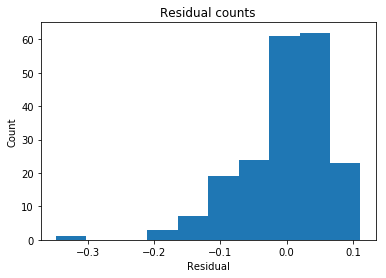


Coefficients: 
 [[ 0.53277975  0.3681531  -0.00464421]]

Intercept: 
 [ 0.05396116]

R-squared:
0.897210638179


In [11]:
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

predicted = regr.predict(X).ravel()
actual = data['Sales']

residual = actual - predicted
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

In [12]:
# TO SOLVE for heteroscedasticity

features = pd.get_dummies(data)
features['high_news'] = np.where(data.Newspaper > .226,1,0)